<a href="https://colab.research.google.com/github/SchulzeEdi/ProjetosIA/blob/main/previsao_populacional_sem_rede_neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA, sarimax

In [ ]:
df = pd.read_csv('POP.csv', parse_dates= True, header=0, index_col="date")

In [ ]:
df

,realtime_start,value,realtime_end
date,,,
1952-01-01,2019-12-06,156309.000,2019-12-06
1952-02-01,2019-12-06,156527.000,2019-12-06
1952-03-01,2019-12-06,156731.000,2019-12-06
1952-04-01,2019-12-06,156943.000,2019-12-06
1952-05-01,2019-12-06,157140.000,2019-12-06
...,...,...,...
2019-08-01,2019-12-06,329591.333,2019-12-06
2019-09-01,2019-12-06,329785.872,2019-12-06
2019-10-01,2019-12-06,329982.035,2019-12-06


In [ ]:
#Dropa as colunas do dataframe
df = df.drop(columns='realtime_start')
df = df.drop(columns='realtime_end')


<Axes: xlabel='date', ylabel='value'>

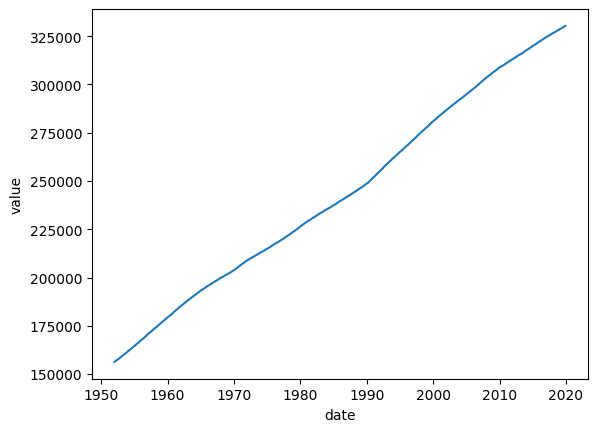

In [ ]:
sns.lineplot(x='date', y='value', data=df)

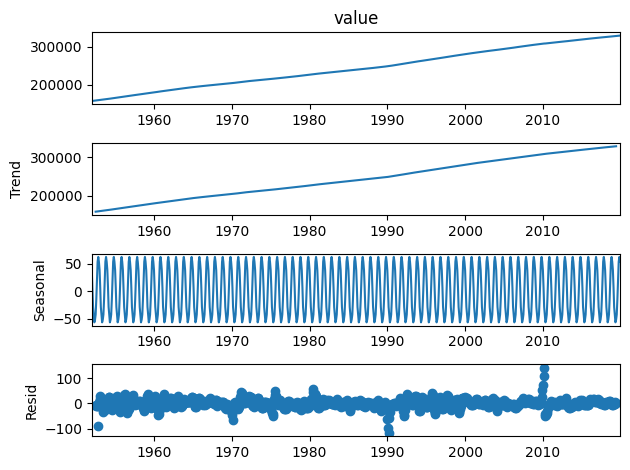

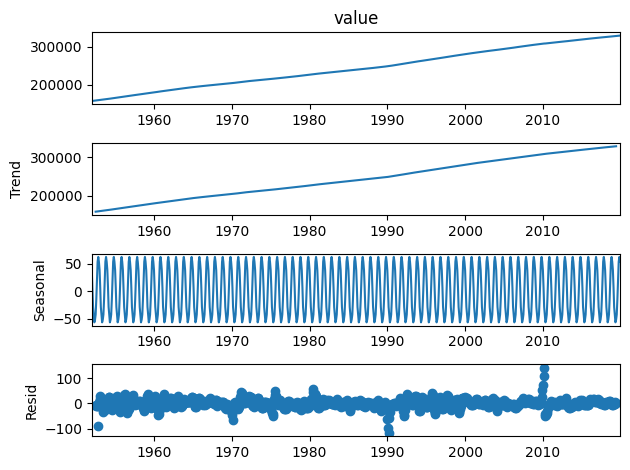

In [ ]:
ssn = seasonal_decompose(df['value'], model='add')
ssn.plot()

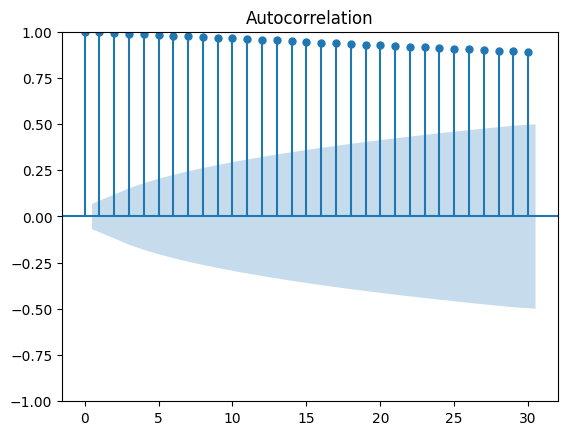

In [ ]:
#ACF é usado para estimar o MA(q)
#PACF é usado para estimar o AR(p)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df)
plt.show()

C:\Users\edibo\AppData\Roaming\Python\Python311\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


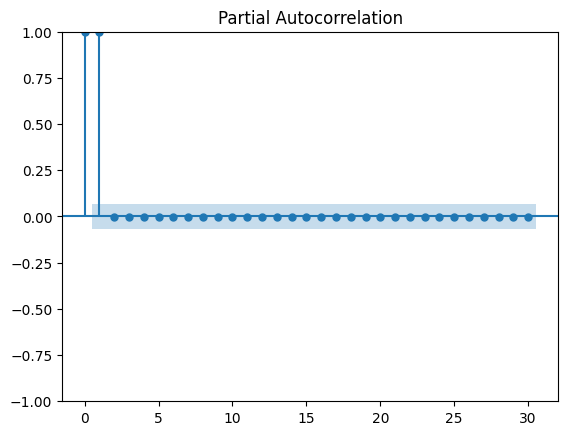

In [ ]:
plot_pacf(df)
plt.show()

In [ ]:
train = df.iloc[:len(df)-200]
test = df.iloc[len(df)-200:]

In [ ]:
print(len(train))
print(len(test))

616
200


In [ ]:
auto_arima_results= auto_arima(train['value'])
auto_arima_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  616
Model:               SARIMAX(1, 2, 2)   Log Likelihood               -2734.321
Date:                Tue, 16 May 2023   AIC                           5476.641
Time:                        18:14:00   BIC                           5494.321
Sample:                    01-01-1952   HQIC                          5483.516
                         - 04-01-2003                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7233      0.052     13.786      0.000       0.620       0.826
ma.L1         -0.9043      0.047    -19.194      0.000      -0.997      -0.812
ma.L2         -0.0419      0.036     -1.177      0.239      -0.112       0.028
sigma2       430.7668     15.748     27.355      0.000     399.902     461.631
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               997.72
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                             0.66
Prob(H) (two-sided):                  0.39   Kurtosis:                         9.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#(p,d,q)
arima_model = ARIMA(train['value'], order= (2,1,2))
arima_model_fit = arima_model.fit()

C:\Users\edibo\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\edibo\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\edibo\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
start = len(train)
end = len(train) + len(test) -1

pred = arima_model_fit.predict(start=start, end=end, dynamic=False, typ="levels").rename("Predicao")

<Axes: title={'center': 'Real vs Predições'}, xlabel='date'>

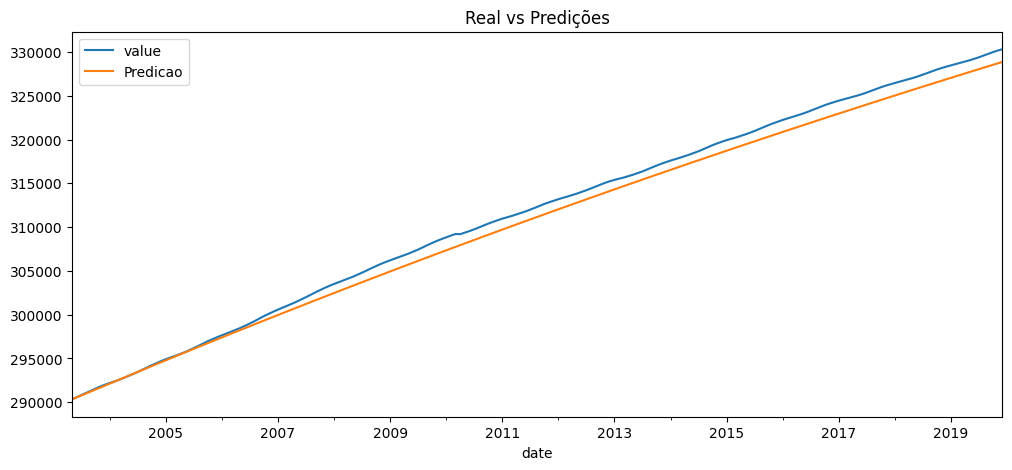

In [ ]:
title= "Real vs Predições"
test["value"].plot(figsize=(12,5), title= title, legend=True)
pred.plot(legend=True)

In [ ]:
import joblib
filename = "previsao_populacao_sem_rede.sav"
joblib.dump(arima_model_fit, filename)